# Confusion Matrix

## Getting Data

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['yes', 'no'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(33.0, 0.5, 'Actuall Value')

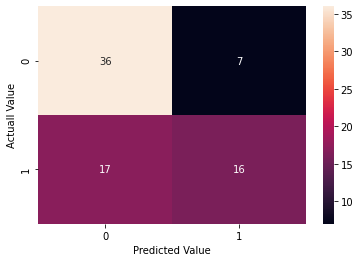

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas

data_frame = pandas.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/c117/heart.csv")

age = data_frame["age"]
heart_attack = data_frame["target"]

age_train, age_test, ha_train, ha_test = train_test_split(age, heart_attack, test_size=0.25, random_state=0)

x_train = numpy.reshape(age_train.ravel(), (len(age_train), 1))
y_train = numpy.reshape(ha_train.ravel(), (len(ha_train), 1))

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train.ravel())

x_test = numpy.reshape(age_test.ravel(), (len(age_test), 1))
y_test = numpy.reshape(ha_test.ravel(), (len(ha_test), 1))

heart_attack_prediction = classifier.predict(x_test)
predicted_values = []

for i in heart_attack_prediction:
    if i == 0:
        predicted_values.append("no")
    else:
        predicted_values.append("yes")

actual_values = []

for i in y_test.ravel():
    if i == 0:
        actual_values.append("no")
    else:
        actual_values.append("yes")

labels = ["yes", "no"]
cm = confusion_matrix(actual_values, predicted_values, labels)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actuall Value")